In [1]:
%pylab inline
import pandas as pd
import re

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('NASA_access_log.gz', sep='\n', header = None)

In [3]:
r = re.compile('([^ ]+) - - \[(.+)\] \"(.+)\" (\d+) (\d+|-)')

m =  array([r.match(x).groups() for x in data[0]])

In [ ]:
#from datetime import datetime
from dateutil.parser import parse
#import locale
#locale.setlocale(locale.LC_TIME, "en_US.UTF-8")

"""
#t = datetime.strptime(m[0][1][:20], "%d/%b/%Y:%H:%M:%S")
t = parse(m[0][1].replace(':', ' ', 1))
#t = datetime.strptime("+4000", "%Z")
print t
"""
hour = []
date = []
for i in xrange(len(m)):
    t = parse(m[i][1].replace(':', ' ', 1))
    #t = datetime.strptime(m[i][1][:20], "%d/%b/%Y:%H:%M:%S")
    d = t.replace(hour=0, minute=0, second=0)
    hour.append((t - d).total_seconds())
    date.append(d.strftime("%s"))

date = asarray(date)
hour = asarray(hour)

In [5]:
def clip(text, pref, suf):
    b = 0
    e = len(text)
    if pref != None:
        b= len(pref)
    if suf != None:
        e = -len(suf)
    return text[b:e].strip()

z = m[:, 2]
re_method = re.compile('^GET|HEAD|POST')
re_protocol= re.compile('HTTP.*$')
method = [ re_method.match(row).group() if re_method.match(row) != None else None for row in z]
protocol = [ re_protocol.search(row).group() if re_protocol.search(row) != None else None for row in z]

content = [[x[0], clip(x[1], x[0], x[2]), x[2]] for x in zip(method, z, protocol)]      

In [94]:
data = hstack((m[:, [0]], 
               reshape(date, (3461612, 1)),
               reshape(hour, (3461612, 1)),
               m[:, [3,4]], content))

print m[200]
print data[200]

Shape: (5,)
['ix-or10-06.ix.netcom.com' '01/Jul/1995:00:03:34 -0400'
 'GET /software/winvn/readme.txt HTTP/1.0' '200' '5736']
Shape: (8,)
['ix-or10-06.ix.netcom.com' '804549600' 214.0 '200' '5736' 'GET'
 '/software/winvn/readme.txt' 'HTTP/1.0']


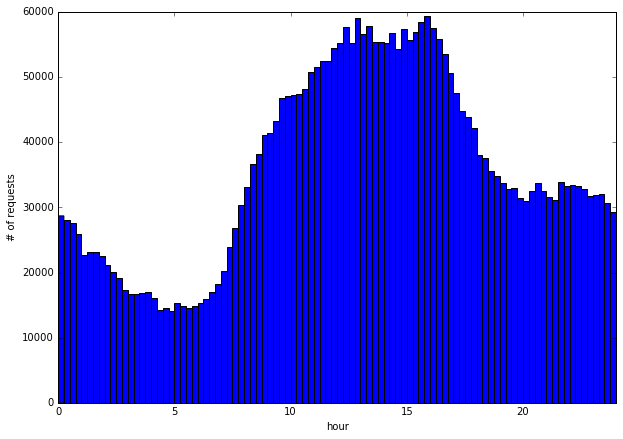

In [78]:
res = 24*60/15 # fifteen minute bars

figure(figsize = (10,7))
xlim(0, 24)
hist(hour/60/60, bins=res)
xlabel('hour')
ylabel('# of requests')

In [97]:
#print datetime.strptime(data[0][1], "%s")

ValueError: 's' is a bad directive in format '%s'